损失函数

In [1]:
import numpy as np


def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

# delta为防止log(0)
# def cross_entropy_error(y,t):
#     delta = 1e-7
#     return -np.sum(t * np.log(y + delta))
# mini-batch版本
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))/batch_size

def cross_entropy_error_not_one_hot(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+ 1e-7))/batch_size

minibatch学习：神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。比如，从60000个训练数据中随机选择100笔，再用这100笔数据进行学习。这种学习方式称为mini-batch学习

In [2]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from sample_code.dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch,t_batch)
print(batch_mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 6 1 0 9 2 1 2 8 1]
[47756  5524  8588 22832 39569 23961 51287 54247 32770 40716]


ndim输出的是维度，还是和形状shape不一样的

In [3]:
t = np.array([[1,2],[4,5],[8,9]])
print(t.size)
print(t.ndim)
print(t.shape)

6
2
(3, 2)


数值微分

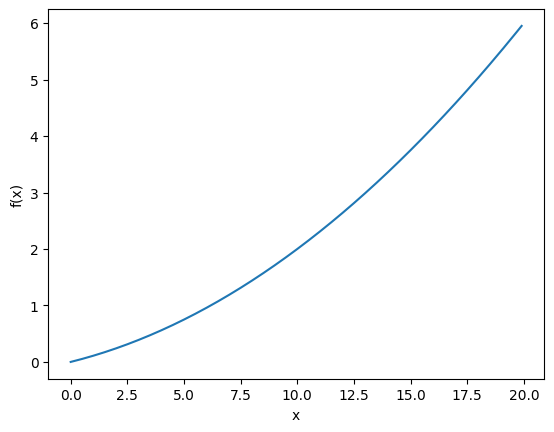

0.19999999998909776
0.29999999997532


In [4]:
# 导数
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f,x):
    h = 1e-5
    return (f(x+h)-f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x
def function_2(x):
    return x[0] ** 2 + x[1] ** 2 + x[2] ** 3
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

梯度 gradient: 梯度表示的是各点处的函数值减小最多的方向
鞍点是从某个方向上看是极大值，从另一个方向上看则是极小值的点。

In [5]:
def numerical_gradient(f,x):
    h = 1e-5
    grad = np.zeros_like(x)
    print(x,x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

res1 = numerical_gradient(function_2, np.array([3.0,4.0,5.0]))
print(res1)
res1 = numerical_gradient(function_2, np.array([0.0,2.0,5.0]))
print(res1)
res1 = numerical_gradient(function_2, np.array([3.0,0.0,5.0]))
print(res1)

[3. 4. 5.] 3
[ 6.  8. 75.]
[0. 2. 5.] 3
[ 0.  4. 75.]
[3. 0. 5.] 3
[ 6.  0. 75.]


梯度下降法

In [6]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr* grad
    return x
init_x = np.array([-3.0,4.0,6.0])
res = gradient_descent(function_2, init_x=init_x, lr = 0.001, step_num=100)
print(res)

[-3.  4.  6.] 3
[-2.994  3.992  5.892] 3
[-2.988012    3.984016    5.78785301] 3
[-2.98203598  3.97604797  5.68735528] 3
[-2.9760719   3.96809587  5.59031725] 3
[-2.97011976  3.96015968  5.49656231] 3
[-2.96417952  3.95223936  5.40592572] 3
[-2.95825116  3.94433488  5.31825362] 3
[-2.95233466  3.93644621  5.23340215] 3
[-2.94642999  3.92857332  5.15123666] 3
[-2.94053713  3.92071617  5.07163094] 3
[-2.93465606  3.91287474  4.99446662] 3
[-2.92878674  3.90504899  4.91963253] 3
[-2.92292917  3.89723889  4.84702418] 3
[-2.91708331  3.88944442  4.77654325] 3
[-2.91124915  3.88166553  4.70809715] 3
[-2.90542665  3.8739022   4.64159862] 3
[-2.89961579  3.86615439  4.5769653 ] 3
[-2.89381656  3.85842208  4.51411947] 3
[-2.88802893  3.85070524  4.45298764] 3
[-2.88225287  3.84300383  4.39350035] 3
[-2.87648837  3.83531782  4.33559181] 3
[-2.87073539  3.82764718  4.27919974] 3
[-2.86499392  3.81999189  4.22426509] 3
[-2.85926393  3.81235191  4.17073184] 3
[-2.8535454   3.8047272   4.11854683] 3

神经网络的梯度

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from sample_code.common.functions import softmax, cross_entropy_error
from sample_code.common.gradient import numerical_gradient
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [8]:
net = simpleNet()
print(net.W)
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
t = np.array([0,0,1])
net.loss(x,t)

[[-1.1311262   1.79146066  0.02607228]
 [ 0.91044212  0.83198141  1.01347636]]
[0.14072219 1.82365966 0.92777209]
1


1.3621791850180054

In [9]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f,net.W) #这里使用nditer，改变了net中的W本身，因此loss也随之变化
print(dW)

#使用lambda的版本：
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

[[ 0.06994434  0.3763943  -0.44633864]
 [ 0.10491651  0.56459145 -0.66950796]]


SGD：对随机选择的数据进行的梯度下降法

In [10]:
import sys, os
sys.path.append(os.pardir)
from sample_code.common.functions import *
from sample_code.common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        z2 = sigmoid(a2)
        y = softmax(z2)
        
        return y
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self, x ,t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
        

使用两层网络

In [11]:
import numpy as np
from sample_code.dataset.mnist import load_mnist
# from sample_code.ch04.two_layer_net import TwoLayerNet
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)
# 超参数
iters_num = 100
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    print(i)
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    print(batch_mask.shape)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

0
(100,)


KeyboardInterrupt: 